In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import Imputer
import numpy as np
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [96]:
inputdata = pd.read_csv('weather_2017.csv')
inputdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 21 columns):
DAY          365 non-null object
TEMP_MAX     365 non-null float64
TEMP_MIN     365 non-null int64
DEW_MAX      365 non-null float64
DEW_MIN      365 non-null int64
SLP_MAX      365 non-null float64
SLP_MIN      365 non-null int64
STP_MAX      365 non-null float64
STP_MIN      365 non-null int64
VISIB_MAX    365 non-null float64
VISIB_MIN    365 non-null int64
WDSP_MAX     365 non-null float64
WDSP_MIN     365 non-null int64
MXSPD        365 non-null float64
UST          365 non-null float64
MAX          365 non-null object
MIN          365 non-null object
PRCP         365 non-null float64
SNDP         365 non-null float64
FRSHTT       365 non-null int64
Class        365 non-null int64
dtypes: float64(10), int64(8), object(3)
memory usage: 60.0+ KB


In [97]:
inputdata.head()

,DAY,TEMP_MAX,TEMP_MIN,DEW_MAX,DEW_MIN,SLP_MAX,SLP_MIN,STP_MAX,STP_MIN,VISIB_MAX,...,WDSP_MAX,WDSP_MIN,MXSPD,UST,MAX,MIN,PRCP,SNDP,FRSHTT,Class
0,1/1/17,53.9,24,46.5,24,1013.6,22,1012.4,24,8.3,...,5.4,24,13.0,18.1,60.1,48.9,0.68,999.9,10000,0
1,1/2/17,56.4,24,45.4,24,1018.1,24,1017.1,24,10.0,...,3.9,24,8.0,999.9,60.1,48.9,0.00,999.9,0,0
2,1/3/17,56.4,24,46.3,24,1021.2,23,1020.3,24,10.0,...,1.3,24,6.0,999.9,62.1,52,0.00,999.9,0,0
3,1/4/17,56.5,24,45.7,24,1021.0,24,1020.0,24,10.0,...,2.6,24,8.0,999.9,64.9,48.9,0.00,999.9,0,0
4,1/5/17,58.3,24,49.8,24,1018.2,19,1017.0,24,7.9,...,3.7,24,9.9,999.9,64.9,48.9,0.00,999.9,10000,0


In [98]:
inputdata.describe()

,TEMP_MAX,TEMP_MIN,DEW_MAX,DEW_MIN,SLP_MAX,SLP_MIN,STP_MAX,STP_MIN,VISIB_MAX,VISIB_MIN,WDSP_MAX,WDSP_MIN,MXSPD,UST,PRCP,SNDP,FRSHTT,Class
count,365.000000,365.0,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.0,365.000000,365.0,365.000000,365.000000,365.000000,3.650000e+02,365.000000,365.000000
mean,65.334247,24.0,53.226575,23.997260,1015.550685,22.523288,1014.568767,23.975342,9.397260,24.0,5.012603,24.0,10.949589,847.088493,0.023425,9.999000e+02,7917.890411,0.112329
std,5.793342,0.0,9.696367,0.052342,3.716718,2.029353,3.722343,0.380782,1.044948,0.0,1.794116,0.0,3.183151,355.713883,0.150116,3.642973e-12,24696.924413,0.316204
min,51.700000,24.0,19.900000,23.000000,1000.900000,13.000000,999.800000,17.000000,3.600000,24.0,1.300000,24.0,5.100000,14.000000,0.000000,9.999000e+02,0.000000,0.000000
25%,61.300000,24.0,48.200000,24.000000,1012.900000,22.000000,1011.900000,24.000000,9.300000,24.0,3.700000,24.0,8.900000,999.900000,0.000000,9.999000e+02,0.000000,0.000000
50%,64.800000,24.0,54.600000,24.000000,1015.200000,23.000000,1014.300000,24.000000,9.900000,24.0,4.900000,24.0,9.900000,999.900000,0.000000,9.999000e+02,0.000000,0.000000
75%,70.100000,24.0,59.900000,24.000000,1017.900000,24.000000,1016.900000,24.000000,10.000000,24.0,6.100000,24.0,12.000000,999.900000,0.000000,9.999000e+02,0.000000,0.000000
max,82.600000,24.0,69.800000,24.000000,1029.800000,24.000000,1028.800000,24.000000,10.000000,24.0,13.200000,24.0,32.100000,999.900000,2.090000,9.999000e+02,100000.000000,1.000000


In [99]:
inputdata.isnull().sum()

DAY          0
TEMP_MAX     0
TEMP_MIN     0
DEW_MAX      0
DEW_MIN      0
SLP_MAX      0
SLP_MIN      0
STP_MAX      0
STP_MIN      0
VISIB_MAX    0
VISIB_MIN    0
WDSP_MAX     0
WDSP_MIN     0
MXSPD        0
UST          0
MAX          0
MIN          0
PRCP         0
SNDP         0
FRSHTT       0
Class        0
dtype: int64

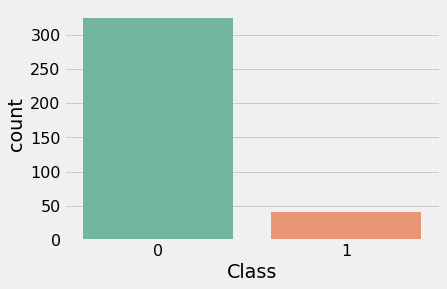

In [100]:
sb.countplot(x='Class',data=inputdata,palette ='Set2')
plt.show()

In [101]:
# Extract the labels
labels = np.array(inputdata.pop('Class'))

In [102]:
inputdata = inputdata.select_dtypes('number')

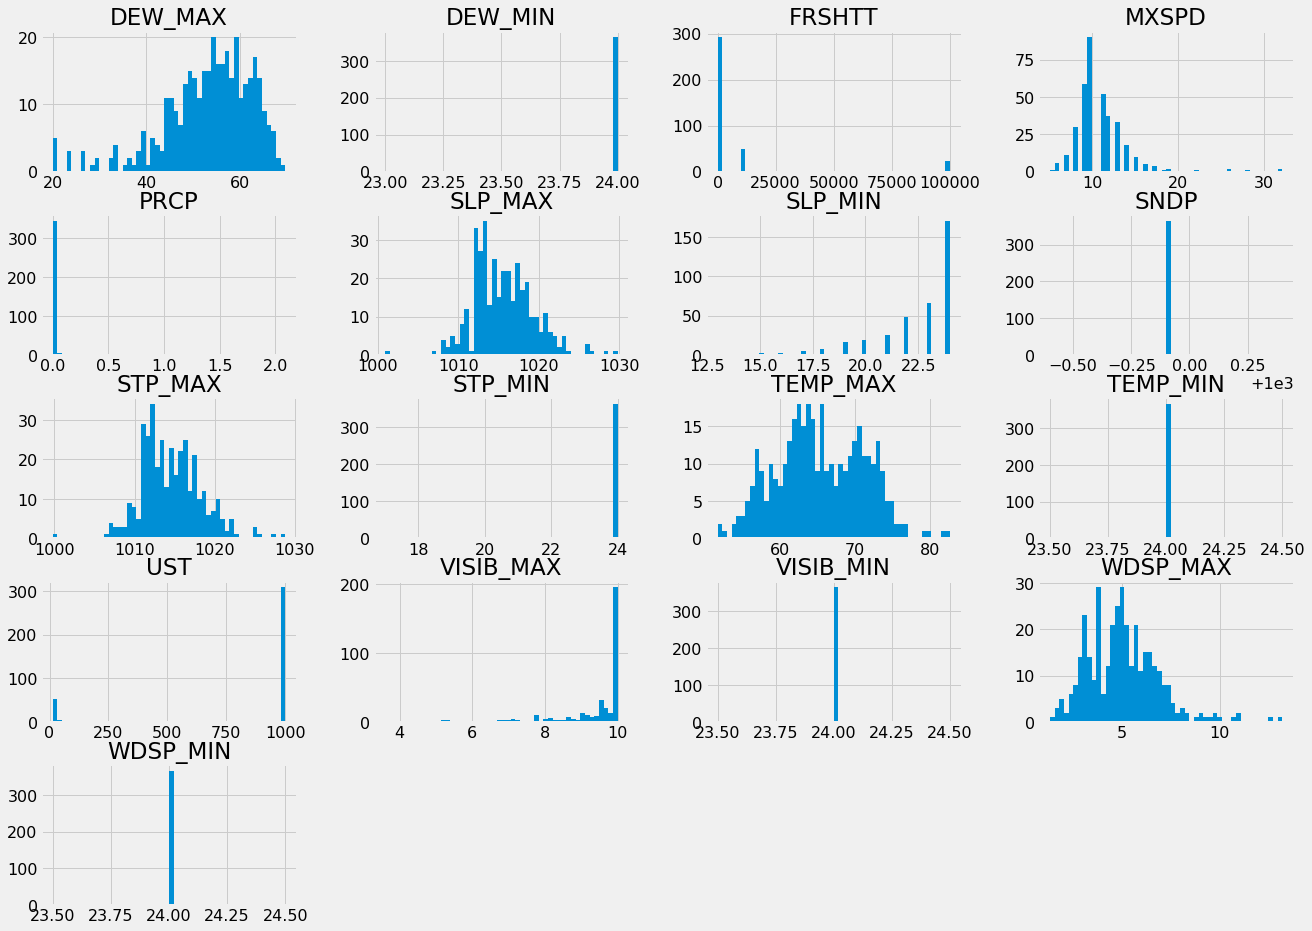

In [103]:
inputdata.hist(bins = 50, figsize = (20,15))
plt.show()

In [104]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(inputdata, labels, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Class'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no fire in oversampled data",len(os_data_y[os_data_y['Class']==0]))
print("Number of  fire in oversampled data",len(os_data_y[os_data_y['Class']==1]))
print("Proportion of no fire data in oversampled data is ",len(os_data_y[os_data_y['Class']==0])/len(os_data_X))
print("Proportion of  fire data in oversampled data is ",len(os_data_y[os_data_y['Class']==1])/len(os_data_X))

length of oversampled data is  466
Number of no fire in oversampled data 233
Number of  fire in oversampled data 233
Proportion of no fire data in oversampled data is  0.5
Proportion of  fire data in oversampled data is  0.5


In [105]:
inputdata = os_data_X
labels = os_data_y

In [106]:
train, test, train_labels, test_labels = train_test_split(inputdata,
                                         labels, 
                                         stratify = labels,
                                         test_size = 0.3, 
                                         random_state = 42)
print(len(train), "train +", len(test), "test")

326 train + 140 test


In [111]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X_train)
X_scaled.mean(axis=0)
X_scaled.std(axis=0)
scaler = preprocessing.StandardScaler().fit(X_train)
scaler.mean_
scaler.scale_ 
scaler.transform(X_train)
scaler.transform(X_test) 

/Users/shalu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
/Users/shalu/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/Users/shalu/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/shalu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/Users/shalu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarni

array([[-0.26185524,  0.        , -0.27232146, ..., -0.15521463,
         1.        , -0.34355567],
       [ 0.8042398 ,  0.        ,  0.58921571, ..., -0.15521463,
         1.        , -0.34355567],
       [-1.07919477,  0.        , -0.14776187, ..., -0.15521463,
         1.        ,  3.4003202 ],
       ...,
       [-0.06640448,  0.        , -0.26194149, ..., -0.15521463,
         1.        , -0.34355567],
       [ 0.8397763 ,  0.        ,  0.97327445, ..., -0.15521463,
         1.        , -0.34355567],
       [ 1.56827458,  0.        ,  1.14973387, ..., -0.15521463,
         1.        , -0.34355567]])

In [70]:
# Imputation of missing values
train = train.fillna(train.mean())
test = test.fillna(test.mean())

In [71]:
inputdata.shape

(466, 17)

In [72]:
test.shape
train.shape

(326, 17)

In [73]:
# Features for feature importances
features = list(train.columns)

In [74]:
# Create the model with 100 trees
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, 
                               random_state=42, 
                               bootstrap = True,
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

In [75]:
# Fit on training data
model.fit(train, train_labels)

/Users/shalu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=1, warm_start=False)

In [76]:
n_nodes = []
max_depths = []

# Stats about the trees in random forest
for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 85
Average maximum depth 12


In [77]:
# Training predictions (to demonstrate overfitting)
train_rf_predictions = model.predict(train)
train_rf_probs = model.predict_proba(train)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [78]:
# Testing predictions (to determine performance)
rf_predictions = model.predict(test)
rf_probs = model.predict_proba(test)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [79]:
test

,TEMP_MAX,TEMP_MIN,DEW_MAX,DEW_MIN,SLP_MAX,SLP_MIN,STP_MAX,STP_MIN,VISIB_MAX,VISIB_MIN,WDSP_MAX,WDSP_MIN,MXSPD,UST,PRCP,SNDP,FRSHTT
100,73.300000,24.0,45.900000,24.0,1012.100000,24.000000,1011.100000,24.0,10.000000,24.0,5.700000,24.0,15.900000,21.0,0.00,999.9,0.000000
62,60.800000,24.0,52.900000,24.0,1018.200000,23.000000,1017.200000,24.0,9.600000,24.0,4.400000,24.0,8.000000,999.9,0.00,999.9,0.000000
265,72.608798,24.0,62.393129,24.0,1013.782405,24.000000,1012.782405,24.0,9.389485,24.0,3.866736,24.0,9.900000,999.9,0.00,999.9,0.000000
189,62.400000,24.0,53.700000,24.0,1016.200000,24.000000,1015.200000,24.0,8.700000,24.0,3.100000,24.0,9.900000,999.9,0.00,999.9,0.000000
426,70.580561,24.0,62.764715,24.0,1013.300000,21.556595,1012.248868,24.0,8.569242,24.0,4.797736,24.0,8.439813,999.9,0.00,999.9,0.000000
379,59.694856,24.0,28.745019,24.0,1019.421865,24.000000,1018.403537,24.0,10.000000,24.0,2.726688,24.0,9.083280,999.9,0.00,999.9,0.000000
115,67.000000,24.0,57.000000,24.0,1012.000000,23.000000,1010.900000,24.0,9.800000,24.0,5.500000,24.0,9.900000,999.9,0.00,999.9,0.000000
106,64.900000,24.0,48.500000,24.0,1017.800000,24.000000,1016.800000,24.0,9.700000,24.0,3.100000,24.0,8.900000,999.9,0.00,999.9,0.000000
316,65.848692,24.0,57.693421,24.0,1017.511836,23.065786,1016.605258,24.0,9.967107,24.0,4.914478,24.0,12.796063,999.9,0.00,999.9,0.000000
79,65.300000,24.0,58.800000,24.0,1013.400000,21.000000,1012.300000,24.0,9.500000,24.0,7.100000,24.0,11.100000,999.9,0.00,999.9,10000.000000


In [80]:
rf_predictions

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0])

In [81]:
test_labels

,Class
100,1
62,0
265,1
189,0
426,1
379,1
115,0
106,0
316,1
79,0


In [82]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

# Plot formatting
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18

In [83]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, 
                                     [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, 
                                      [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); 
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    plt.show();

In [84]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, rf_predictions))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91        70
           1       0.90      0.93      0.92        70

   micro avg       0.91      0.91      0.91       140
   macro avg       0.91      0.91      0.91       140
weighted avg       0.91      0.91      0.91       140



Recall Baseline: 1.0 Test: 0.93 Train: 1.0
Precision Baseline: 0.5 Test: 0.9 Train: 1.0
Roc Baseline: 0.5 Test: 0.98 Train: 1.0


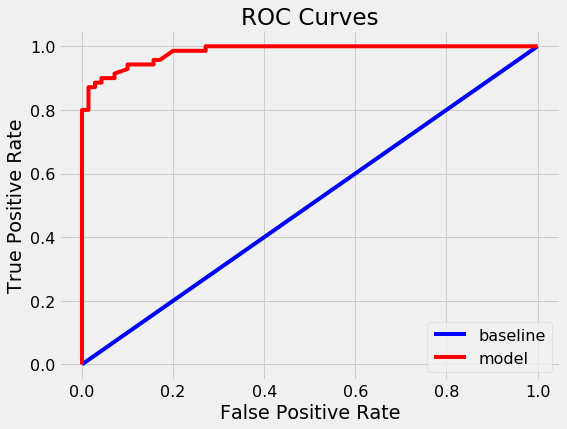

<Figure size 432x288 with 0 Axes>

In [85]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)
plt.savefig('roc_auc_curve.png')

In [86]:
from sklearn.metrics import confusion_matrix
import itertools

In [87]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization
[[63  7]
 [ 5 65]]


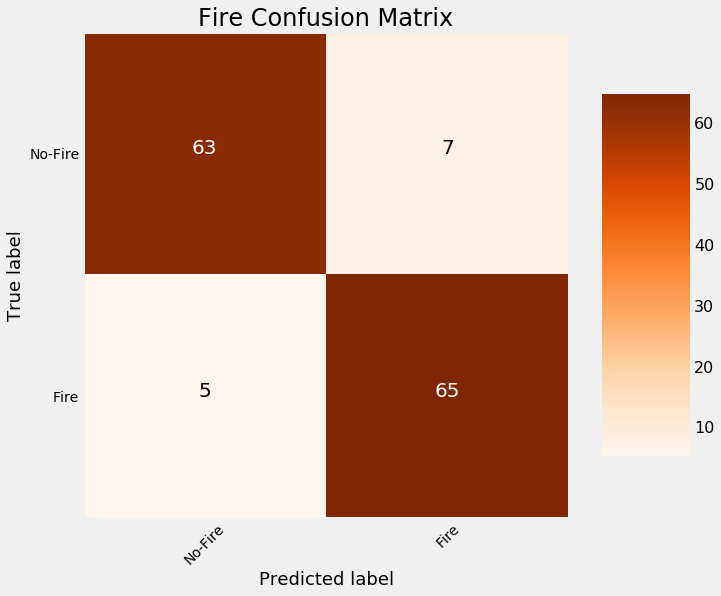

In [88]:
# Confusion matrix
cm = confusion_matrix(test_labels, rf_predictions)
plot_confusion_matrix(cm, classes = ['No-Fire', 'Fire'],
                      title = 'Fire Confusion Matrix')

plt.savefig('cm.png')

In [89]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(test_labels, rf_probs)

In [90]:
roc_value

0.9828571428571429

In [91]:
#Feature Importance
# Extract feature importances
fi = pd.DataFrame({'feature': list(train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Display
fi.head()

,feature,importance
0,TEMP_MAX,0.180816
10,WDSP_MAX,0.175543
2,DEW_MAX,0.145792
12,MXSPD,0.107772
4,SLP_MAX,0.099310


In [92]:
#Saving the model

import pickle

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(model)

In [93]:
# Load the pickled model 
rf_from_pickle = pickle.loads(saved_model) 
  
# Use the loaded pickled model to make predictions 
rf_from_pickle.predict(test) 

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0])

In [94]:
#Saving model in binary file

with open('RF_model_pickle','wb') as file:
    pickle.dump(model, file)